In [1]:
# import requries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv('airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.drop( columns = 'index', inplace = True) # Remove index columns

In [4]:
df.info() # summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.shape # shows rows, columns

(300153, 11)

In [6]:
df.isnull().sum() # check for missing values

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [7]:
df.duplicated().sum() # check for duplicates

np.int64(0)

Great, there is a not null values and also no duplicated values.::

In [8]:
df.columns # columns names

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [9]:
df['airline'].unique() # unique airlines

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [10]:
df.groupby('airline')['price'].agg(['mean', 'max', 'min'])

,mean,max,min
airline,,,
AirAsia,4091.072742,31917,1105
Air_India,23507.019112,90970,1526
GO_FIRST,5652.007595,32803,1105
Indigo,5324.216303,31952,1105
SpiceJet,6179.278881,34158,1106
Vistara,30396.536302,123071,1714


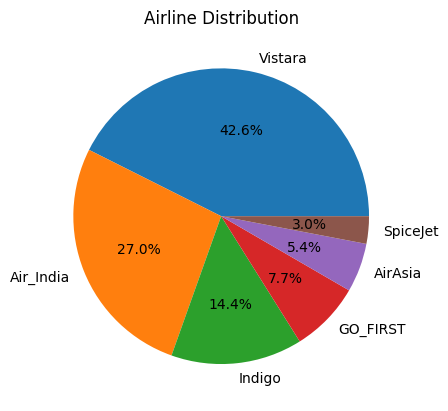

In [11]:
plt.pie(df['airline'].value_counts(), labels = df['airline'].value_counts().index, autopct = '%1.1f%%')
plt.title('Airline Distribution')
plt.show()

In this graph, show Vistara airline preferred is more, then Air India and Spicejet very less.

In [12]:
df['departure_time'].value_counts() # show departure time for the flight

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [13]:
df['arrival_time'].value_counts() # show arrival time for the flight

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


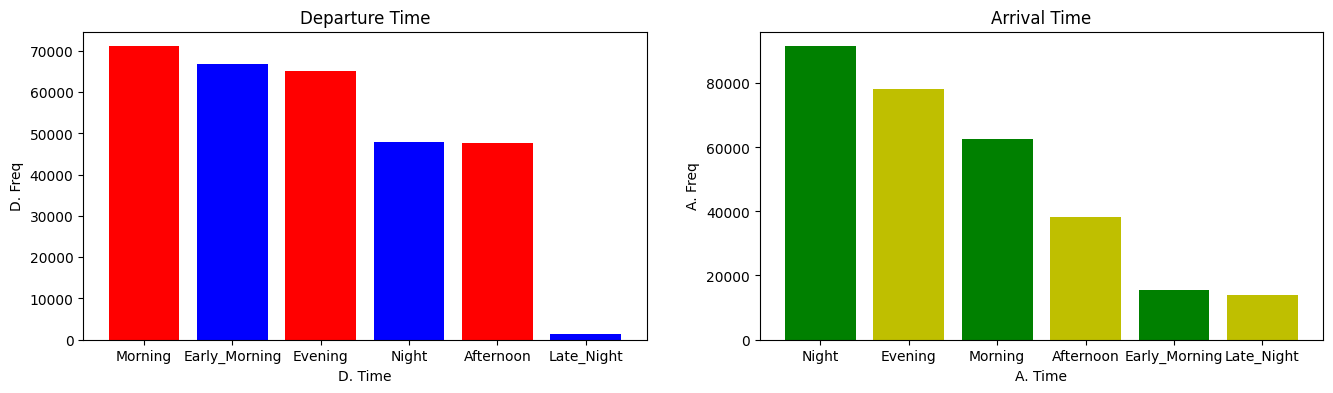

In [14]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)

plt.bar( df['departure_time'].value_counts().index , df['departure_time'].value_counts().values, color = ['r', 'b'] )
plt.title("Departure Time")
plt.xlabel("D. Time")
plt.ylabel("D. Freq")

plt.subplot(1,2,2)

plt.bar( df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values, color = ['g', 'y'])
plt.title("Arrival Time")
plt.xlabel("A. Time")
plt.ylabel("A. Freq")

plt.show()

In this graphs, show the departure and arrival time for the flight.

In the Departure time, mostly flight departure on the morning and less on the late night.

In the Arrival time, mostly flight arrival on the night time and the less flight arrival on the late night.

In [15]:
df['price'].describe() # Descriptive Statistics

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


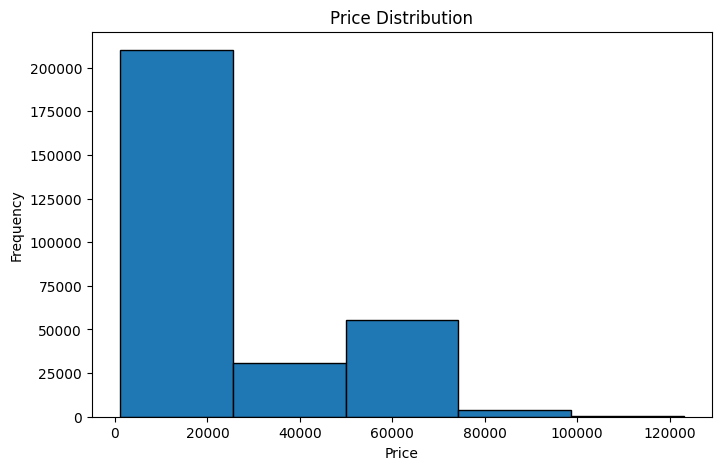

In [16]:
plt.figure(figsize=(8,5))  # Width=8, Height=5
plt.hist(df['price'], bins=5, edgecolor='black')  # edgecolor se bars separate dikhte hain
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This Histogram show, the price distribution.

In [17]:
df.groupby('class')['price'].agg(['mean', 'max', 'min']) # used groupby for class and price

,mean,max,min
class,,,
Business,52540.081124,123071,12000
Economy,6572.342383,42349,1105


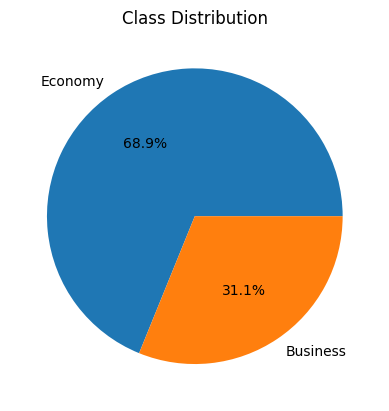

In [18]:
plt.pie(df['class'].value_counts(), labels = df['class'].value_counts().index, autopct = '%1.1f%%')
plt.title('Class Distribution')
plt.show()

In this pie chart, show the more people preferred the Economy class.

In Conclusion, Firstly, clean the data using pandas, then using numpy and matplotlib.
Show the Airline distribution, Departure and Arrival times for the flight, price and class distribution.